# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

## <font color='blue'>Table of Contents</font>

* [Introduction](#intro)
* [Data Exploration](#expl)
* [Decision Tree](#dt)
* [Random Forest](#rf) 
* [XGBoost](#xgb) 
* [CatBoost](#cb) 
* [LightGBM](#lgb) 
* [Conclusions](#cl) 

<a id='intro'></a>
### <font color='brown'> Introduction </font>

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

### Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

### Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally too intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from dtreeviz.trees import *
from IPython.display import Image, display_svg

<a id='expl'></a>
### <font color='brown'> Data Exploration </font>

In [2]:
# read data
df = pd.read_csv('GermanCredit.csv')
df.head()
df.shape

(1000, 62)

In [3]:
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [4]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [5]:
# Summary statistics
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [6]:
# Columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [7]:
# Split the dataframe into features and labels
features = df.drop('Class', axis=1)
print(features.shape)
target = (df.Class == 'Good') * 1
print(target.shape)

(1000, 61)
(1000,)


In [8]:
# Check if classes are balanced
target.value_counts()

1    700
0    300
Name: Class, dtype: int64

In [9]:
# Convert dataframe to array
import numpy as np
X = np.asarray(features)
y = np.asarray(target)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report, \
precision_recall_fscore_support, confusion_matrix 

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
def train_test_model(clf, algorithm, X_train, X_test, y_train, y_test, params=None):
    '''Takes a classifier object, train, test and prints performance metrics'''
    if params:
        # Make an f1_score scoring object.
        # Since classes are imbalanced, I used f1_score. But tried accuracy also and gave almost the same result
        scorer = make_scorer(f1_score) 
        
        # Perform grid search on the classifier using 'scorer' as the scoring method.
        grid_obj = GridSearchCV(clf, params, scoring=scorer) 
        
        # Fit the grid search object to the training data and find the optimal parameters.
        grid_fit = grid_obj.fit(X_train, y_train)

        # Get the estimator.
        clf = grid_fit.best_estimator_

        # Fit the new model.
        clf.fit(X_train, y_train)
        
        # Print best parmeters
        print(f"Best parameters for {algorithm}: {grid_fit.best_params_}")
    else:
        # Fit the model with default parameters
        clf.fit(X_train, y_train)
    
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    training_accuracy = round(accuracy_score(y_train, train_predictions), 2)
    test_accuracy = round(accuracy_score(y_test, test_predictions), 2)
    training_f1 = round(f1_score(y_train, train_predictions), 2)
    test_f1 = round(f1_score(y_test, test_predictions), 2)
    
    # Print accuracy and f1_score
    print('Training accuracy:', training_accuracy)
    print('Test accuracy:', test_accuracy)
    print('\n')
    print('Training F1 score:', training_f1)
    print('Test F1 Score:', test_f1)
    
    return clf, algorithm, test_accuracy, test_f1

        

In [13]:
# Variables to collect performance of various algorithms
algo = []
accuracy = []
f1 = []

<a id='dt'></a>
### <font color='brown'> Decision Tree </font>

In [14]:
# Decision tree with default hyperparameters
clf = DecisionTreeClassifier(random_state=42)

# Train and test model using train_test_model function
clf_dt, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'Decision Tree', X_train, X_test, y_train, 
                                                             y_test, params=None)

Training accuracy: 1.0
Test accuracy: 0.65


Training F1 score: 1.0
Test F1 Score: 0.75


In [15]:
# Decision tree with tuned hyperparameters
clf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth': [2,4,6,8,10,20,30,40,50,60,70,80,90,100,None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1,2,4,6,8,10],
 'min_samples_split': [2,4,6,8,10]}

# Train and test model using train_test_model function
clf_dt, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'Decision Tree', X_train, X_test, y_train, 
                                                          y_test, params=parameters)
algo.append(algorithm)
accuracy.append(test_accuracy)
f1.append(test_f1)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for Decision Tree: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 2}
Training accuracy: 0.76
Test accuracy: 0.72


Training F1 score: 0.84
Test F1 Score: 0.82


In [16]:
# Get confusion matrix
print(confusion_matrix(y_test, clf_dt.predict(X_test)))

[[ 20  71]
 [ 14 195]]


In [17]:
# Get various performance metrics for the model
print(classification_report(y_test, clf_dt.predict(X_test), target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.59      0.22      0.32        91
        Good       0.73      0.93      0.82       209

    accuracy                           0.72       300
   macro avg       0.66      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [18]:
# ! pip install dtreeviz
# Also had to download the Graphviz from the link below and add graphviz to path variable

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [19]:
# Add graphviz to PATH variable
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [43]:
# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
viz = dtreeviz(clf_dt, X_train, y_train, target_name='Class',
              feature_names=list(df.columns),
              class_names=['Bad', 'Good'], orientation='LR')

viz.save('dtreeviz.svg') 
# The visualization is saved instead of displaying because displaying the visualization messed up the notebook.
# Saved visualization is displayed in the makrkdown cell below.

<Figure size 720x720 with 0 Axes>

![Dtreeviz visualization](dtreeviz.png)

<a id='rf'></a>
### <font color='brown'> Random Forests </font>

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly they have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Random Forest with default hyperparameters
clf = RandomForestClassifier(random_state=42)

# Train and test model using train_test_model function
clf_rf, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'Random Forest', X_train, X_test, y_train, 
                                                             y_test, params=None)

Training accuracy: 0.99
Test accuracy: 0.77


Training F1 score: 0.99
Test F1 Score: 0.84


C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# Random Forest with tuned hyperparameters
clf = RandomForestClassifier(random_state=42)

parameters = {'max_depth': [4,50,100], 
              'min_samples_leaf': [2,6],
              'n_estimators':[10,100,500],
              'min_samples_split': [2,4]}

# Train and test model using train_test_model function
clf_rf, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'Random Forest', X_train, X_test, y_train, 
                                                          y_test, params=parameters)
algo.append(algorithm)
accuracy.append(test_accuracy)
f1.append(test_f1)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters for Random Forest: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 0.95
Test accuracy: 0.77


Training F1 score: 0.97
Test F1 Score: 0.85


In [24]:
# Get various performance metrics for the random forest model
print(classification_report(y_test, clf_rf.predict(X_test), target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.78      0.35      0.48        91
        Good       0.77      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.78      0.65      0.67       300
weighted avg       0.77      0.77      0.74       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 1 (0.112361)
2. feature 4 (0.090830)
3. feature 0 (0.087982)
4. feature 12 (0.051281)
5. feature 9 (0.049733)
6. feature 17 (0.032242)
7. feature 2 (0.031655)
8. feature 3 (0.029718)
9. feature 18 (0.025281)
10. feature 29 (0.021591)
11. feature 10 (0.019630)
12. feature 15 (0.018486)
13. feature 7 (0.016825)
14. feature 5 (0.016084)
15. feature 49 (0.016073)
16. feature 47 (0.016012)
17. feature 21 (0.015641)
18. feature 41 (0.015395)
19. feature 34 (0.015192)
20. feature 55 (0.014145)
21. feature 40 (0.014045)
22. feature 13 (0.013768)
23. feature 53 (0.013327)
24. feature 35 (0.012866)
25. feature 50 (0.012508)
26. feature 60 (0.012327)
27. feature 54 (0.012109)
28. feature 51 (0.012098)
29. feature 59 (0.012064)
30. feature 37 (0.011115)
31. feature 14 (0.010851)
32. feature 48 (0.010462)
33. feature 58 (0.010263)
34. feature 20 (0.010034)
35. feature 36 (0.009617)
36. feature 44 (0.009575)
37. feature 27 (0.009138)
38. feature 33 (0.008855)
39. feature 

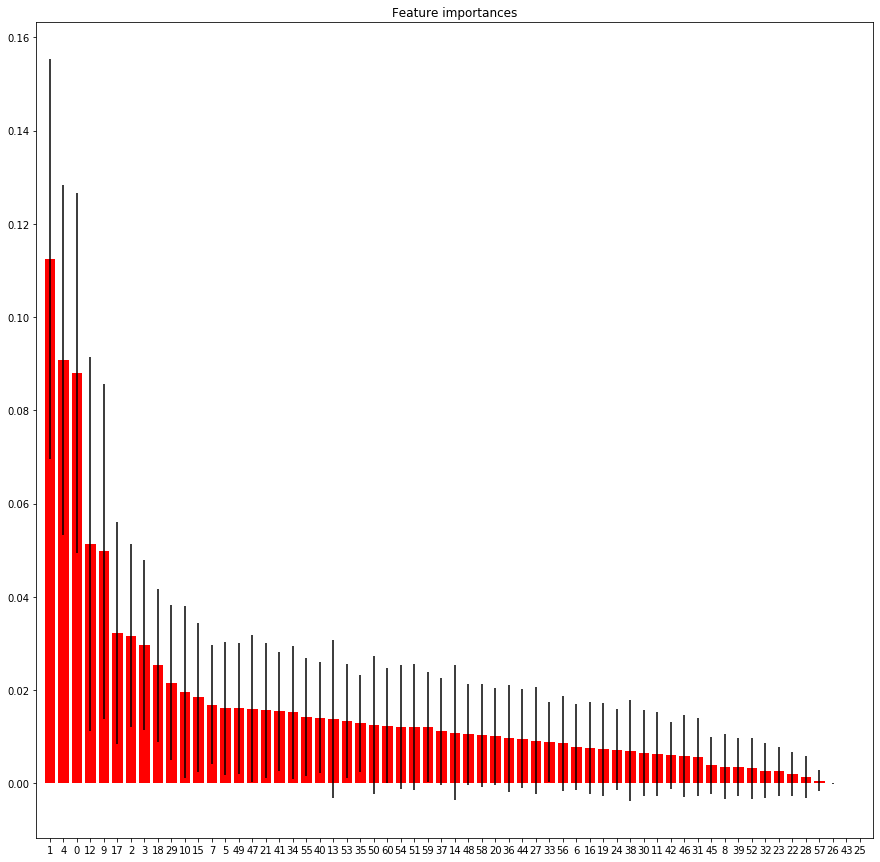

In [25]:
# Bar plot of feature importances
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [26]:
# ! pip install pdpbox
from pdpbox import pdp

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

### <font color='brown'> Partial Dependent Plots </font>
I have drawn PDPs for 3 most important and 3 least important features as per feature importances determined above.

In [27]:
# Since you have to feed dataframe into PDP, create a copy of the dataframe
df_pdp = df.copy()
# Encode the Class variable to 0 and 1
df_pdp.Class = (df_pdp.Class == 'Good') * 1
model_features = list(df.columns)
model_features.remove('Class')

In [28]:
def pdp_plots(feature_list):
    '''Takes a list of features and draw partial dependence plots'''
    for i in feature_list:
        pdp_iso = pdp.pdp_isolate(model=clf_rf,
                                  dataset=df_pdp,
                                  model_features=model_features,
                                  feature=i)
        pdp.pdp_plot(pdp_isolate_out=pdp_iso, feature_name=i)

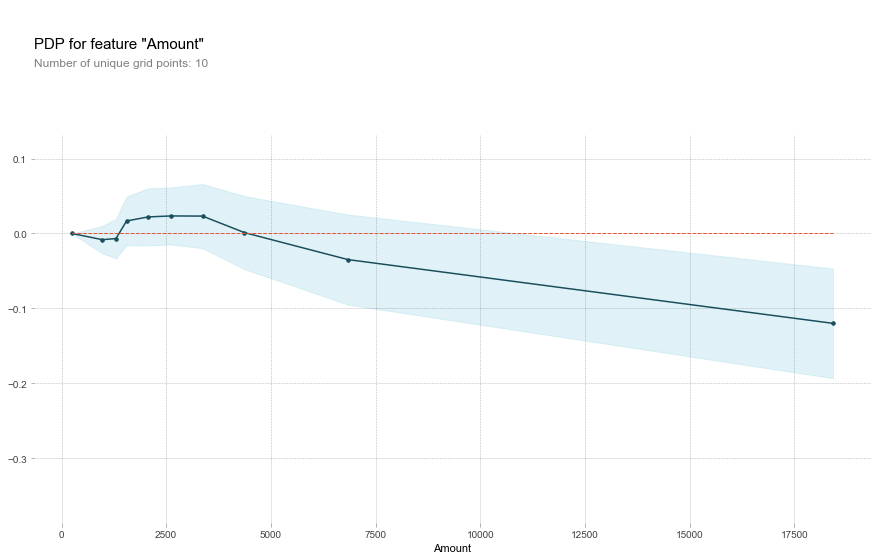

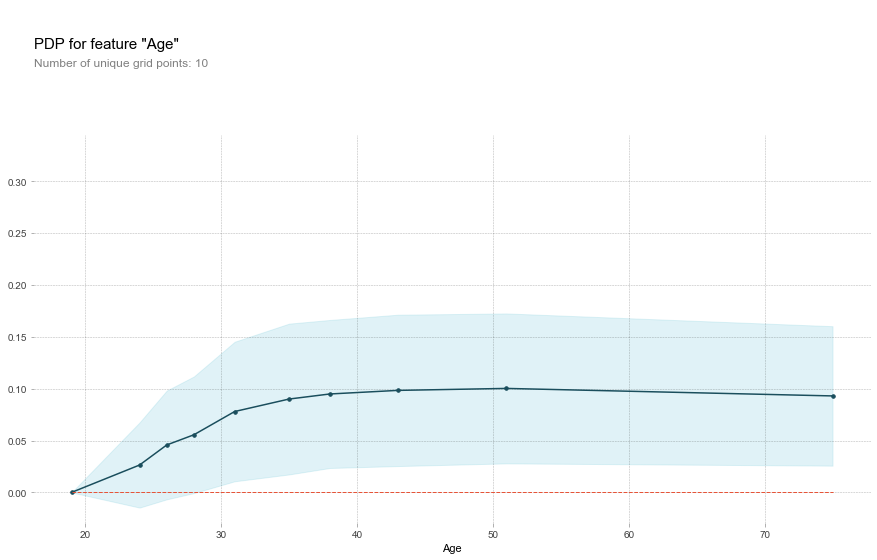

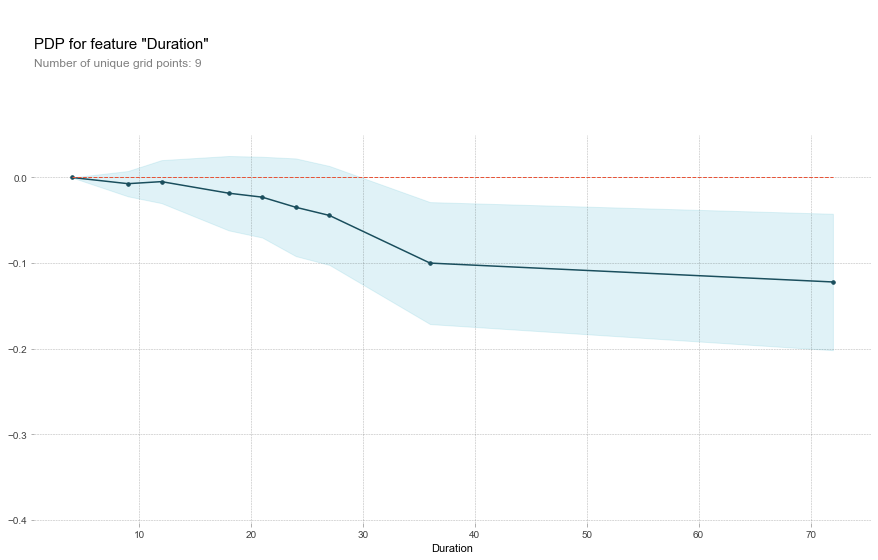

In [29]:
# PDPs for 3 most important features
most_imp_features = [list(features.columns)[i] for i in indices[[0, 1, 2]]] 
pdp_plots(most_imp_features)

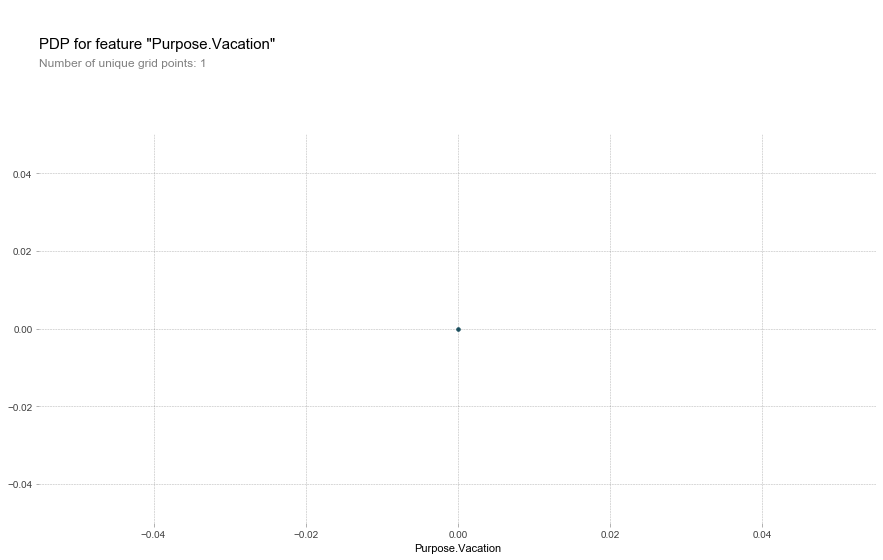

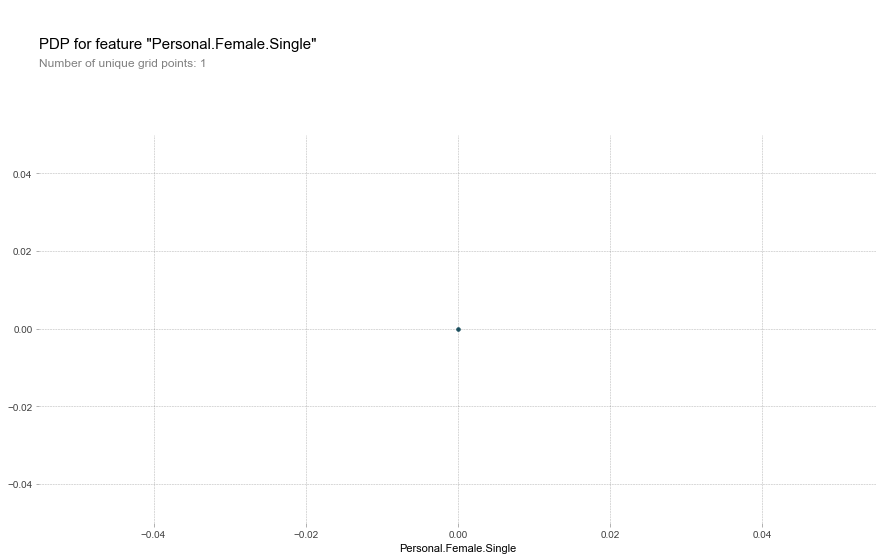

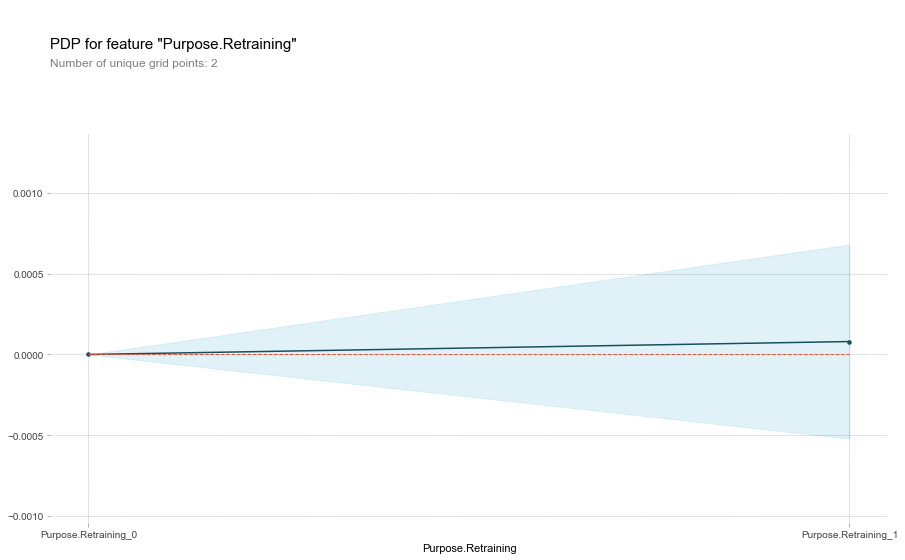

In [30]:
# PDPs for 3 least important features
least_imp_features = [list(features.columns)[i] for i in indices[[-1, -2, -3]]]
pdp_plots(least_imp_features)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

<a id='xgb'></a>
### <font color='brown'> XGBoost </font>


In [31]:
# ! conda install -c anaconda py-xgboost
from xgboost import XGBClassifier

In [32]:
# XGBoost with default hyperparameters
clf = XGBClassifier(random_state=42)

# Train and test model using train_test_model function
clf_xgb, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'XGBoost', X_train, X_test, y_train, 
                                                             y_test, params=None)

Training accuracy: 0.89
Test accuracy: 0.77


Training F1 score: 0.93
Test F1 Score: 0.85


In [33]:
# XGBoost with tuned hyperparameters
clf = XGBClassifier(random_state=42)

parameters = {'max_depth': [3], 
              'n_estimators' : [100],
              'min_child_weight': [1]}

# I tried many different values in gridsearch. Interestingly default parameters gives the best result. So I used only default
# parameters above. Here Gridsearch is not necessary as only default parameters are used in the gridsearch. Since I already
# wrote the code for gridsearch I left it.

# Train and test model using train_test_model function
clf_xgb, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'XGBoost', X_train, X_test, y_train, 
                                                          y_test, params=parameters)

algo.append(algorithm)
accuracy.append(test_accuracy)
f1.append(test_f1)

Best parameters for XGBoost: {'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Training accuracy: 0.89
Test accuracy: 0.77


Training F1 score: 0.93
Test F1 Score: 0.85


<a id='cb'></a>
### <font color='brown'> CatBoost </font>


In [34]:
# ! conda install -c conda-forge catboost
from catboost import CatBoostClassifier

In [35]:
# CatBoost with default hyperparameters

clf = CatBoostClassifier(random_state=42, logging_level='Silent')

# Train and test model using train_test_model function
clf_cb, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'CatBoost', X_train, X_test, y_train, 
                                                             y_test, params=None)

Training accuracy: 0.95
Test accuracy: 0.79


Training F1 score: 0.96
Test F1 Score: 0.86


In [36]:
# CatBoost with tuned hyperparameter
clf = CatBoostClassifier(random_state=42)

parameters = {'depth':[6],
              'loss_function':['Logloss'],
              'logging_level':['Silent']
             }
# Here again, I tried many different values in gridsearch. Here also default parameters gives the best result.
# Parameters dictionary above has only default parameters.

clf_cb, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'CatBoost', X_train, X_test, y_train, 
                                                          y_test, params=parameters)

algo.append(algorithm)
accuracy.append(test_accuracy)
f1.append(test_f1)

Best parameters for CatBoost: {'depth': 6, 'logging_level': 'Silent', 'loss_function': 'Logloss'}
Training accuracy: 0.95
Test accuracy: 0.79


Training F1 score: 0.96
Test F1 Score: 0.86


<a id='lgb'></a>
### <font color='brown'> LightGBM </font>


In [37]:
# ! conda install -c conda-forge lightgbm
import lightgbm as lgb

In [38]:
# LibhtGBM with default hyperparameters

clf = lgb.LGBMClassifier(random_state=42)

# Train and test model using train_test_model function
clf_lg, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'LightGBM', X_train, X_test, y_train, 
                                                             y_test, params=None)

Training accuracy: 1.0
Test accuracy: 0.79


Training F1 score: 1.0
Test F1 Score: 0.86


In [39]:
# LightGBM with tuned hyperparameters
clf = lgb.LGBMClassifier(random_state=42)

parameters = {'learning_rate': [0.1],
              'n_estimators': [100],
              'num_leaves': [31]}
# Here also default parameters yielded better result. Parameters dictionary above has only default parameters.

# Train and test model using train_test_model function
clf_lg, algorithm, test_accuracy, test_f1 = train_test_model(clf, 'LightGBM', X_train, X_test, y_train, 
                                                             y_test, params=parameters)

algo.append(algorithm)
accuracy.append(test_accuracy)
f1.append(test_f1)

Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Training accuracy: 1.0
Test accuracy: 0.79


Training F1 score: 1.0
Test F1 Score: 0.86


In [40]:
# Print classification report for LightGBM
print(classification_report(y_test, clf_lg.predict(X_test), target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.71      0.51      0.59        91
        Good       0.81      0.91      0.86       209

    accuracy                           0.79       300
   macro avg       0.76      0.71      0.72       300
weighted avg       0.78      0.79      0.78       300



Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

### <font color='brown'> Comparison of different algorithms </font>

In [41]:
score_df = pd.DataFrame({'Algorithm' : algo,
                        'Test Accuracy' : accuracy,
                        'Test F1 Score' : f1})
score_df                

,Algorithm,Test Accuracy,Test F1 Score
0,Decision Tree,0.72,0.82
1,Random Forest,0.77,0.85
2,XGBoost,0.77,0.85
3,CatBoost,0.79,0.86
4,LightGBM,0.79,0.86


### <font color='brown'> Why default parameters gave better results in boosting algorithms? </font>

In boosting algorithms I used above, although I included default parameters in the gridsearch, tuned hyperparameters yielded performance that is worse than the model trained without parameter tuning. The reasons for this could be;

- In the training set, we have only 700 observations. When I grid search with CV=3, only ~460 observations are available for training. This probably leads to poor training and selection of poor parameters. It is true I used all the 700 points for final training. But still the final training uses the hyperparameters obtained by training the model using ~460 points. In contrast, when I trained the model without gridsearch, the model is trained on all 700 data points, which may lead to better training.

- If I include more parameters and more possible values in gridsearch, it may improve performance. But with limited computational resource I have, it would take very long.

Note: I wanted to try cv=10 in grid search. However, this was taking very long time to tune, so I did not put a lot of effort on this. This may or may not imporve performance as this would leave only 70 points for validation.

<a id='cl'></a>
### <font color='brown'> Conclusions </font>

Decision tree model did not perform much better than zero-information prediction function; if we had just predicted mode of the target label (1) without considering any input, we would have got ~70% accuracy. The decision tree model is just slightly better (72% accuracy) than this baseline model. 

With random forest and XGBoost, I got an accuracy of 77%. The highest accuracy was obtained with CatBoost and LightGBM. Still it was just 79%. The critical limitation of these models is that it performed very poorly in identifying Bad loans, which is most important thing for a banker. For instance, LightGBM with an accuracy of 79%, could recall only 51% of the bad loans.

A response variable related to financial matter like this is likely to influenced by many other variables. In this dataset, we have 61 predictor variables. To identify the relationship of all these variables with the response variable, which may or may not exist, we need much larger dataset than just 1000 observations.